#**스마트폰 센서 데이터 기반 모션 분류**
# 단계3 : 단계별 모델링


## 0.미션

단계별로 나눠서 모델링을 수행하고자 합니다.  

* 단계1 : 정적(0), 동적(1) 행동 분류 모델 생성
* 단계2 : 세부 동작에 대한 분류모델 생성
    * 단계1 모델에서 0으로 예측 -> 정적 행동 3가지 분류 모델링
    * 단계1 모델에서 1으로 예측 -> 동적 행동 3가지 분류 모델링
* 모델 통합
    * 두 단계 모델을 통합하고, 새로운 데이터에 대해서 최종 예측결과와 성능평가가 나오도록 함수로 만들기
* 성능 비교
    * 기본 모델링의 성능과 비교
    * 모든 모델링은 [다양한 알고리즘 + 성능 튜닝]을 수행해야 합니다.


## 1.환경설정

### (1) 라이브러리 불러오기

* 세부 요구사항
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [ ]:
#!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 필요하다고 판단되는 라이브러리를 추가하세요.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

### (2) 데이터 불러오기

* 주어진 데이터셋
    * data01_train.csv : 학습 및 검증용

 <br/>  

* 세부 요구사항
    - data01_train.csv 를 불러와 'data' 이름으로 저장합니다.
        - data에서 변수 subject는 삭제합니다.
    - data01_test.csv 를 불러와 'new_data' 이름으로 저장합니다.


In [ ]:
data = pd.read_csv('data01_train.csv')

In [ ]:
data.drop('subject', axis=1, inplace=True)

In [ ]:
new_data = pd.read_csv('data01_test.csv')

In [ ]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.487737,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,STANDING
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.237820,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,LAYING
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,-0.535287,-0.829311,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,STANDING
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.004012,-0.408956,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,WALKING
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.157832,-0.563437,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,WALKING_DOWNSTAIRS


In [ ]:
data.shape

(5881, 562)

In [ ]:
new_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.284379,-0.021981,-0.116683,-0.992490,-0.979640,-0.963321,-0.992563,-0.977304,-0.958142,-0.938850,...,-0.850065,-0.018043,0.092304,0.074220,-0.714534,-0.671943,-0.018351,-0.185733,22,SITTING
1,0.277440,-0.028086,-0.118412,-0.996620,-0.927676,-0.972294,-0.997346,-0.931405,-0.971788,-0.939837,...,-0.613367,-0.022456,-0.155414,0.247498,-0.112257,-0.826816,0.184489,-0.068699,15,STANDING
2,0.305833,-0.041023,-0.087303,0.006880,0.182800,-0.237984,0.005642,0.028616,-0.236474,0.016311,...,0.394388,-0.362616,0.171069,0.576349,-0.688314,-0.743234,0.272186,0.053101,22,WALKING
3,0.276053,-0.016487,-0.108381,-0.995379,-0.983978,-0.975854,-0.995877,-0.985280,-0.974907,-0.941425,...,-0.841455,0.289548,0.079801,-0.020033,0.291898,-0.639435,-0.111998,-0.123298,8,SITTING
4,0.271998,0.016904,-0.078856,-0.973468,-0.702462,-0.869450,-0.979810,-0.711601,-0.856807,-0.920760,...,0.214219,0.010111,0.114179,-0.830776,-0.325098,-0.840817,0.116237,-0.096615,5,STANDING


In [ ]:
new_data.shape

(1471, 563)

## 2.데이터 전처리

* 세부 요구사항
    - Label 추가 : data 에 Activity_dynamic 를 추가합니다. Activity_dynamic은 과제1에서 is_dynamic과 동일한 값입니다.
    - x와 y1, y2로 분할하시오.
        * y1 : Activity
        * y2 : Activity_dynamic
    - train : val = 8 : 2 혹은 7 : 3
    - random_state 옵션을 사용하여 다른 모델과 비교를 위해 성능이 재현되도록 합니다.

In [ ]:
data['Activity_dynamic'] = data['Activity'].apply(lambda x: 1 if x in ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS'] else 0)

In [ ]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity,Activity_dynamic
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,STANDING,0
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,LAYING,0
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,-0.829311,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,STANDING,0
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.408956,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,WALKING,1
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.563437,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,WALKING_DOWNSTAIRS,1


In [ ]:
x = data.drop(columns = ['Activity', 'Activity_dynamic'])
y1 = data['Activity']
y2 = data['Activity_dynamic']

In [ ]:
x_train, x_val, y1_train, y1_val, y2_train, y2_val = train_test_split(x, y1, y2, test_size = .2, random_state = 1)

In [ ]:
rf_model = RandomForestClassifier(random_state=20)
rf_model.fit(x_train, y1_train)
y1_pred = rf_model.predict(x_val)

### x와 y1 : Activity 예측

In [ ]:
print('Accuracy:', accuracy_score(y1_val, y1_pred))
print('='*60)
print('Confusion Matrix:')
print(confusion_matrix(y1_val, y1_pred))
print('='*60)
print('Classification Report:')
print(classification_report(y1_val, y1_pred))

Accuracy: 0.9796091758708582
Confusion Matrix:
[[221   0   0   0   0   1]
 [  0 191   7   0   0   0]
 [  0   7 228   0   0   0]
 [  0   0   0 188   2   2]
 [  0   0   0   1 153   2]
 [  0   0   0   1   1 172]]
Classification Report:
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       222
           SITTING       0.96      0.96      0.96       198
          STANDING       0.97      0.97      0.97       235
           WALKING       0.99      0.98      0.98       192
WALKING_DOWNSTAIRS       0.98      0.98      0.98       156
  WALKING_UPSTAIRS       0.97      0.99      0.98       174

          accuracy                           0.98      1177
         macro avg       0.98      0.98      0.98      1177
      weighted avg       0.98      0.98      0.98      1177



In [ ]:
accuracy = accuracy_score(y1_val, y1_pred)
conf_matrix = confusion_matrix(y1_val, y1_pred)
class_report = classification_report(y1_val, y1_pred)

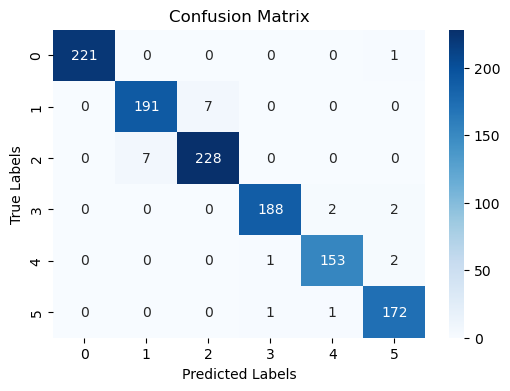

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### x와 y2 : Activity_dynamic 예측

In [ ]:
rf_model2 = RandomForestClassifier(random_state=20)
rf_model2.fit(x_train, y2_train)
y2_pred = rf_model2.predict(x_val)

In [ ]:
print('Accuracy:', accuracy_score(y2_val, y2_pred))
print('='*60)
print('Confusion Matrix:')
print(confusion_matrix(y2_val, y2_pred))
print('='*60)
print('Classification Report:')
print(classification_report(y2_val, y2_pred))

Accuracy: 0.9983007646559049
Confusion Matrix:
[[653   2]
 [  0 522]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       655
           1       1.00      1.00      1.00       522

    accuracy                           1.00      1177
   macro avg       1.00      1.00      1.00      1177
weighted avg       1.00      1.00      1.00      1177



In [ ]:
accuracy = accuracy_score(y2_val, y2_pred)
conf_matrix = confusion_matrix(y2_val, y2_pred)
class_report = classification_report(y2_val, y2_pred)

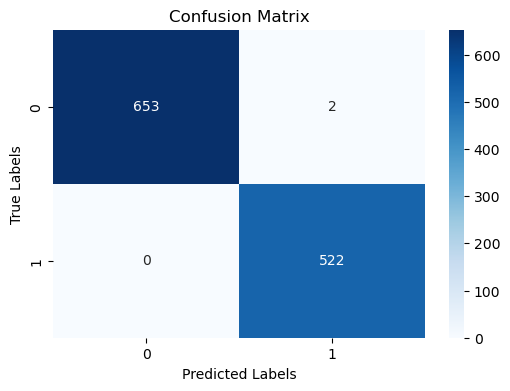

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## **3.단계별 모델링**

![](https://github.com/DA4BAM/image/blob/main/step%20by%20step.png?raw=true)

### (1) 단계1 : 정적/동적 행동 분류 모델

* 세부 요구사항
    * 정적 행동(Laying, Sitting, Standing)과 동적 행동(동적 : Walking, Walking-Up, Walking-Down)을 구분하는 모델 생성.
    * 몇가지 모델을 만들고 가장 성능이 좋은 모델을 선정하시오.

#### 1) 알고리즘1 : RandomForest

In [ ]:
target = 'Activity_dynamic'
x = data.drop(['Activity',target], axis=1)
y = data.loc[:, target]

In [ ]:
scaler = MinMaxScaler()
x_s = scaler.fit_transform(x)

In [ ]:
dynamic_model_rf = RandomForestClassifier(random_state=20)

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=1)
dynamic_model_rf.fit(x_train, y_train)
dynamic_y_pred = dynamic_model_rf.predict(x_val)

In [ ]:
print('RandomForest Accuracy:', accuracy_score(y_val, dynamic_y_pred))
print('='*60)
print('RandomForest Confusion Matrix:')
print(confusion_matrix(y_val, dynamic_y_pred))
print('='*60)
print('RandomForest Classification Report:')
print(classification_report(y_val, dynamic_y_pred))

RandomForest Accuracy: 0.9886792452830189
RandomForest Confusion Matrix:
[[212   2   0]
 [  0 153   0]
 [  4   0 159]]
RandomForest Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       214
         1.0       0.99      1.00      0.99       153
         2.0       1.00      0.98      0.99       163

    accuracy                           0.99       530
   macro avg       0.99      0.99      0.99       530
weighted avg       0.99      0.99      0.99       530



#### 2) 알고리즘2 : XGBClassifier

In [ ]:
xgb_model = XGBClassifier(random_state = 20)

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=1)
xgb_model.fit(x_train, y_train)
xgb_y_pred = xgb_model.predict(x_val)

In [ ]:
print('XGB Accuracy:', accuracy_score(y_val, xgb_y_pred))
print('='*60)
print('XGB Confusion Matrix:')
print(confusion_matrix(y_val, xgb_y_pred))
print('='*60)
print('XGB Classification Report:')
print(classification_report(y_val, xgb_y_pred))

XGB Accuracy: 1.0
XGB Confusion Matrix:
[[214   0   0]
 [  0 153   0]
 [  0   0 163]]
XGB Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       214
         1.0       1.00      1.00      1.00       153
         2.0       1.00      1.00      1.00       163

    accuracy                           1.00       530
   macro avg       1.00      1.00      1.00       530
weighted avg       1.00      1.00      1.00       530



### (2) 단계2-1 : 정적 동작 세부 분류

* 세부 요구사항
    * 정적 행동(Laying, Sitting, Standing)인 데이터 추출
    * Laying, Sitting, Standing 를 분류하는 모델을 생성
    * 몇가지 모델을 만들고 가장 성능이 좋은 모델을 선정하시오.

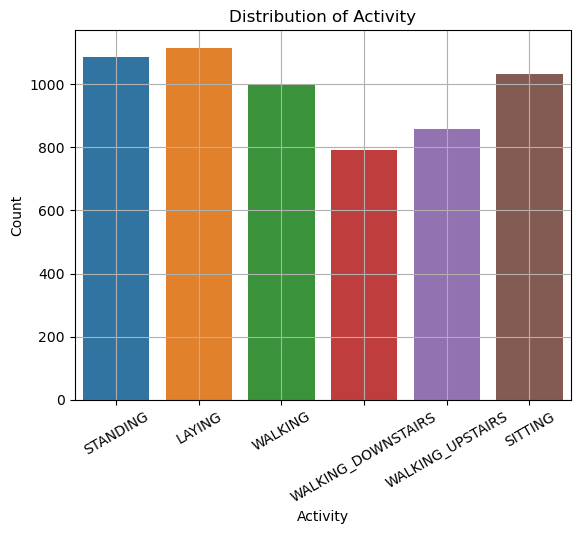

In [ ]:
sns.countplot(data=data, x='Activity')
plt.title('Distribution of Activity')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.grid()
plt.show()

## 전처리

In [ ]:
static_data = data[data['Activity'].isin(['LAYING', 'SITTING', 'STANDING'])]

In [ ]:
static_data['Activity'] = data['Activity'].map({'LAYING':0, 'SITTING':1, 'STANDING':2})
static_data.head()

C:\Users\User\AppData\Local\Temp\ipykernel_18080\3215200025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  static_data['Activity'] = data['Activity'].map({'LAYING':0, 'SITTING':1, 'STANDING':2})


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity,Activity_dynamic
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,2.0,0
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,0.0,0
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,-0.829311,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,2.0,0
7,0.272026,-0.001329,-0.125491,-0.992068,-0.912985,-0.972451,-0.994752,-0.943141,-0.976428,-0.925446,...,-0.704995,-0.024442,0.076332,0.741277,0.729812,-0.817201,0.037746,0.136129,2.0,0
8,0.284338,0.021956,-0.006925,-0.980153,-0.838394,-0.782357,-0.983683,-0.816199,-0.743923,-0.914011,...,-0.400197,0.021212,-0.009465,-0.282762,0.563343,-0.782072,0.242834,-0.025285,2.0,0


In [ ]:
x = static_data.drop(columns=['Activity', 'Activity_dynamic'])
y = static_data['Activity']

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

In [ ]:
y_train.value_counts() / len(y_train)

Activity
0.0    0.344414
2.0    0.334364
1.0    0.321221
Name: count, dtype: float64

## 딥러닝

In [ ]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

561

In [ ]:
# Sequential 타입 모델 선언
model = Sequential([
    Dense(64, activation='relu', input_shape = (nfeatures,),),
    Dense(42, activation='relu'),
    Dense(3, activation='softmax')
])

# 모델요약
model.summary()

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │          35,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 42)                  │           2,730 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,827 (151.67 KB)

 Trainable params: 38,827 (151.67 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.01), loss= 'sparse_categorical_crossentropy')
history = model.fit(x_train, y_train, epochs = 20, validation_split=0.2, verbose = 0).history

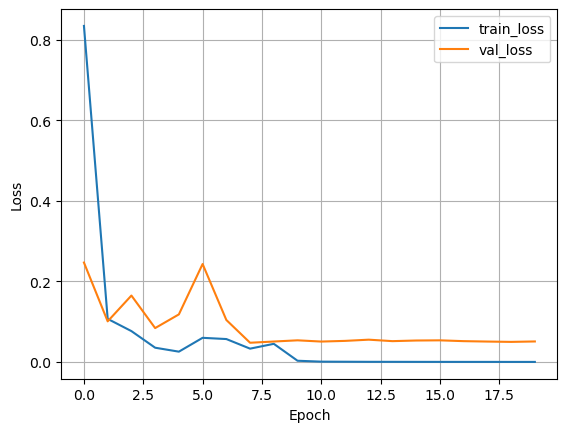

In [ ]:
plt.plot(history['loss'], label='train_loss')
plt.plot(history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:
pred = model.predict(x_val)
pred

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


array([[9.99999762e-01, 1.97861638e-07, 8.03711472e-11],
       [9.42400780e-13, 5.93732286e-10, 1.00000000e+00],
       [9.99999881e-01, 1.16436304e-07, 1.79632353e-09],
       ...,
       [9.99965668e-01, 5.65836081e-06, 2.87170042e-05],
       [1.23691439e-11, 1.09740768e-08, 1.00000000e+00],
       [9.99999642e-01, 3.08801702e-07, 2.47895287e-08]], dtype=float32)

In [ ]:
pred = model.predict(x_val)
pred[:5]

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[9.99999762e-01, 1.97861638e-07, 8.03711472e-11],
       [9.42400780e-13, 5.93732286e-10, 1.00000000e+00],
       [9.99999881e-01, 1.16436304e-07, 1.79632353e-09],
       [1.00000000e+00, 3.08252019e-08, 2.27691355e-11],
       [9.99999762e-01, 1.81640814e-07, 4.05778611e-09]], dtype=float32)

In [ ]:
# 5개 행만 살펴보면
np.argmax(pred[:5], axis = 1)

array([0, 2, 0, 0, 0], dtype=int64)

In [ ]:
# 전체에 적용해서 변환합시다.
pred_1 = pred.argmax(axis=1)
pred_1

array([0, 2, 0, 0, 0, 1, 1, 2, 2, 1, 1, 0, 2, 1, 0, 0, 0, 0, 1, 1, 2, 1,
       2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 2, 0, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 1, 2, 0, 2, 2, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 1, 1, 0, 0, 2, 1, 2, 1, 2, 0, 2,
       0, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 1, 2,
       2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 2, 2, 2, 1, 2,
       2, 0, 0, 2, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 0, 0, 2, 0,
       0, 1, 1, 1, 0, 2, 1, 1, 1, 2, 2, 2, 1, 0, 0, 0, 1, 2, 0, 0, 2, 0,
       2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 2, 0, 0, 1, 2, 0, 0, 2, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 2, 1, 0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 2, 0, 1, 2, 0, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1,
       0, 0, 0, 2, 1, 1, 1, 0, 2, 0, 0, 0, 1, 0, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 2, 0, 1, 0, 1, 1, 2, 0, 0, 1, 1, 0, 1, 2,

In [ ]:
y_val

5672    0.0
5853    2.0
897     0.0
3992    0.0
2280    0.0
       ... 
3598    2.0
1588    1.0
3210    0.0
2346    2.0
3988    0.0
Name: Activity, Length: 530, dtype: float64

In [ ]:
print('정적 딥러닝 Accuracy:', accuracy_score(y_val, pred_1))
print('='*60)
print('정적 딥러닝 Confusion_matrix:', confusion_matrix(y_val, pred_1))
print('='*60)
print('정적 딥러닝 Clssification:',classification_report(y_val, pred_1))

정적 딥러닝 Accuracy: 0.9943396226415094
정적 딥러닝 Confusion_matrix: [[214   0   0]
 [  0 152   1]
 [  1   1 161]]
정적 딥러닝 Clssification:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       214
         1.0       0.99      0.99      0.99       153
         2.0       0.99      0.99      0.99       163

    accuracy                           0.99       530
   macro avg       0.99      0.99      0.99       530
weighted avg       0.99      0.99      0.99       530



## 랜덤포레스트

In [ ]:
rf_model = RandomForestClassifier(random_state=20)
rf_model.fit(x_train, y_train)

rf_y_pred = rf_model.predict(x_val)

In [ ]:
print('정적 Random Forest Classifier:')
print('정적 Accuracy:', accuracy_score(y_val, rf_y_pred))
print('='*60)
print('정적 Confusion Matrix:')
print(confusion_matrix(y_val, rf_y_pred))
print('='*60)
print('정적 Classification Report:')
print(classification_report(y_val, rf_y_pred))

정적 Random Forest Classifier:
정적 Accuracy: 0.9886792452830189
정적 Confusion Matrix:
[[212   2   0]
 [  0 153   0]
 [  4   0 159]]
정적 Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       214
         1.0       0.99      1.00      0.99       153
         2.0       1.00      0.98      0.99       163

    accuracy                           0.99       530
   macro avg       0.99      0.99      0.99       530
weighted avg       0.99      0.99      0.99       530



### (3) 단계2-2 : 동적 동작 세부 분류

* 세부 요구사항
    * 동적 행동(Walking, Walking Upstairs, Walking Downstairs)인 데이터 추출
    * Walking, Walking Upstairs, Walking Downstairs 를 분류하는 모델을 생성
    * 몇가지 모델을 만들고 가장 성능이 좋은 모델을 선정하시오.

## 전처리

In [ ]:
dynamic_data = data[data['Activity'].isin(['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS'])]

In [ ]:
dynamic_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity,Activity_dynamic
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.408956,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,WALKING,1
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.563437,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,WALKING_DOWNSTAIRS,1
5,0.330708,0.007561,-0.061371,-0.215760,0.101075,0.072949,-0.269857,0.060060,0.101298,-0.019263,...,-0.887024,-0.030645,-0.852091,-0.500195,0.306091,-0.552729,0.253885,0.291256,WALKING_UPSTAIRS,1
6,0.121465,-0.031902,-0.005196,-0.152198,-0.113104,-0.239423,-0.202401,-0.164698,-0.247099,0.114668,...,-0.775779,0.445206,-0.003487,-0.940185,0.041387,-0.886603,0.173338,-0.005627,WALKING,1
12,0.303885,0.002768,-0.038613,-0.168656,0.190336,-0.140473,-0.205134,0.101144,-0.120572,-0.000818,...,-0.329728,-0.040030,0.257252,0.076091,-0.123425,-0.752882,0.266729,0.045692,WALKING,1


In [ ]:
dynamic_data['Activity'] = data['Activity'].map({'WALKING':0, 'WALKING_UPSTAIRS':1, 'WALKING_DOWNSTAIRS':2})
dynamic_data.head()

C:\Users\User\AppData\Local\Temp\ipykernel_18080\1459045437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dynamic_data['Activity'] = data['Activity'].map({'WALKING':0, 'WALKING_UPSTAIRS':1, 'WALKING_DOWNSTAIRS':2})


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity,Activity_dynamic
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.408956,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,0.0,1
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.563437,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,2.0,1
5,0.330708,0.007561,-0.061371,-0.215760,0.101075,0.072949,-0.269857,0.060060,0.101298,-0.019263,...,-0.887024,-0.030645,-0.852091,-0.500195,0.306091,-0.552729,0.253885,0.291256,1.0,1
6,0.121465,-0.031902,-0.005196,-0.152198,-0.113104,-0.239423,-0.202401,-0.164698,-0.247099,0.114668,...,-0.775779,0.445206,-0.003487,-0.940185,0.041387,-0.886603,0.173338,-0.005627,0.0,1
12,0.303885,0.002768,-0.038613,-0.168656,0.190336,-0.140473,-0.205134,0.101144,-0.120572,-0.000818,...,-0.329728,-0.040030,0.257252,0.076091,-0.123425,-0.752882,0.266729,0.045692,0.0,1


In [ ]:
x = dynamic_data.drop(columns=['Activity', 'Activity_dynamic'])
y = dynamic_data['Activity']

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

In [ ]:
y_train.value_counts() / len(y_train)

Activity
0.0    0.377421
1.0    0.322626
2.0    0.299953
Name: count, dtype: float64

## 딥러닝

In [ ]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

561

In [ ]:
# Sequential 타입 모델 선언
model2 = Sequential([
    Dense(64, activation='relu', input_shape = (nfeatures,),),
    Dense(42, activation='relu'),
    Dense(3, activation='softmax')
])

# 모델요약
model2.summary()

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 64)                  │          35,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 42)                  │           2,730 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,827 (151.67 KB)

 Trainable params: 38,827 (151.67 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model2.compile(optimizer=Adam(learning_rate=0.01), loss= 'sparse_categorical_crossentropy')
history = model.fit(x_train, y_train, epochs = 20, validation_split=0.2, verbose = 0).history

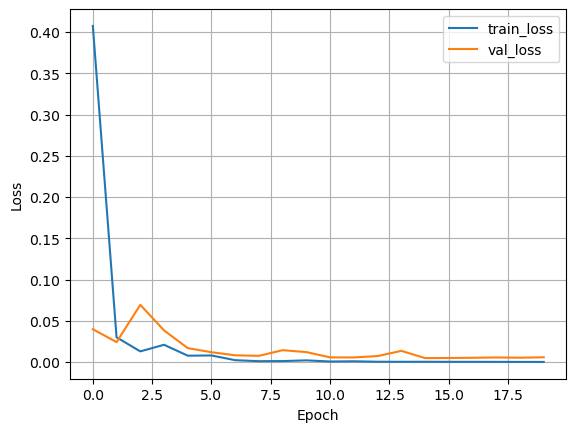

In [ ]:
plt.plot(history['loss'], label='train_loss')
plt.plot(history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:
pred = model.predict(x_val)
pred[:5]

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[2.9666509e-07, 9.9999964e-01, 1.2410632e-08],
       [1.0000000e+00, 4.9892228e-09, 1.1264029e-09],
       [9.9968874e-01, 3.1127784e-04, 2.6135311e-08],
       [1.0000000e+00, 5.7112942e-10, 8.7184565e-10],
       [1.1143006e-07, 9.9999988e-01, 2.7803186e-08]], dtype=float32)

In [ ]:
# 5개 행만 살펴보면
np.argmax(pred[:5], axis = 1)

array([1, 0, 0, 0, 1], dtype=int64)

In [ ]:
# 전체에 적용해서 변환합시다.
pred_1 = pred.argmax(axis=1)
pred_1

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 2, 0, 1, 1, 0, 2, 0, 1,
       2, 1, 1, 0, 1, 1, 2, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 1, 0, 2, 0, 0,
       2, 1, 0, 2, 0, 2, 0, 1, 2, 1, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       2, 0, 2, 1, 0, 1, 0, 1, 2, 0, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0,
       0, 0, 1, 2, 1, 0, 2, 0, 2, 1, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1,
       1, 1, 0, 1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 1, 0, 0, 2, 1, 2, 2, 0, 1,
       2, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 0, 2, 1, 2, 0, 0, 2, 0, 1, 2,
       0, 1, 0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 2, 1, 2, 0, 0, 0, 0, 2, 1, 0, 1, 0, 2, 2, 2, 1, 2, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 2, 2, 1, 0, 2, 2, 0, 1, 0, 1, 0, 2, 1, 2, 0,
       0, 1, 1, 1, 2, 0, 2, 0, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 2, 2, 1, 2,
       1, 0, 0, 0, 0, 2, 0, 2, 1, 1, 0, 0, 0, 2, 0, 1, 1, 2, 0, 1, 2, 2,
       0, 1, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 2, 2, 0, 2, 0,
       2, 1, 1, 0, 2, 0, 1, 2, 0, 2, 0, 1, 2, 0, 1,

In [ ]:
y_val

4900    1.0
634     0.0
3200    0.0
3446    0.0
641     1.0
       ... 
5851    1.0
2702    2.0
3272    0.0
4318    1.0
2247    2.0
Name: Activity, Length: 530, dtype: float64

In [ ]:
print('동적 딥러닝 Accuracy:', accuracy_score(y_val, pred_1))
print('='*60)
print('동적 딥러닝 Confusion_matrix:',confusion_matrix(y_val, pred_1))
print('='*60)
print('동적 딥러닝 Classification:',classification_report(y_val, pred_1))

동적 딥러닝 Accuracy: 0.9943396226415094
동적 딥러닝 Confusion_matrix: [[198   1   0]
 [  0 175   0]
 [  2   0 154]]
동적 딥러닝 Classification:               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       199
         1.0       0.99      1.00      1.00       175
         2.0       1.00      0.99      0.99       156

    accuracy                           0.99       530
   macro avg       0.99      0.99      0.99       530
weighted avg       0.99      0.99      0.99       530



In [ ]:
## 랜덤포레스트

In [ ]:
rf_model = RandomForestClassifier(random_state=20)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=20)

In [ ]:
rf_y_pred = rf_model.predict(x_val)

In [ ]:
print('동적 RandomForest Classifier:')
print('동적 RandomForest Accuracy:', accuracy_score(y_val, rf_y_pred))
print('='*60)
print('동적 RandomForest Confusion Matrix:')
print(confusion_matrix(y_val, rf_y_pred))
print('='*60)
print('동적 RandomForest Classification Report:')
print(classification_report(y_val, rf_y_pred))

동적 RandomForest Classifier:
동적 RandomForest Accuracy: 0.9905660377358491
동적 RandomForest Confusion Matrix:
[[198   1   0]
 [  1 173   1]
 [  2   0 154]]
동적 RandomForest Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       199
         1.0       0.99      0.99      0.99       175
         2.0       0.99      0.99      0.99       156

    accuracy                           0.99       530
   macro avg       0.99      0.99      0.99       530
weighted avg       0.99      0.99      0.99       530



### [선택사항] (4) 분류 모델 합치기


* 세부 요구사항
    * 두 단계 모델을 통합하고, 새로운 데이터(test)에 대해서 최종 예측결과와 성능평가가 나오도록 함수로 만들기
    * 데이터 파이프라인 구축 : test데이터가 로딩되어 전처리 과정을 거치고, 예측 및 성능 평가 수행

![](https://github.com/DA4BAM/image/blob/main/pipeline%20function.png?raw=true)

#### 1) 함수 만들어서 분류 모델 합치기

In [ ]:
target = 'Activity'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

In [ ]:
y_dynamic = y.copy().map(lambda x: 1 if x in ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS'] else 0)

In [ ]:
y_static = y.isin(['LAYING', 'SITTING', 'STANDING'])
x_static = x[y_static]
y_static = y[y_static]

In [ ]:
y_activity = y.isin(['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS'])
x_activity = x[y_activity]
y_activity = y[y_activity]

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y1, test_size=0.2, random_state=1)
x_train_dynamic, x_valid_dynamic, y_train_dynamic, y_valid_dynamic = train_test_split(x, y_dynamic, test_size=0.2, random_state=1)
x_train_activity, x_valid_activity, y_train_activity, y_valid_activity = train_test_split(x_activity, y_activity, test_size=0.2, random_state=1)
x_train_static, x_valid_static, y_train_static, y_valid_static = train_test_split(x_static, y_static, test_size=0.2, random_state=1)

### RandomForest

In [ ]:
model_dynamic = RandomForestClassifier()
model_dynamic.fit(x_train_dynamic, y_train_dynamic)

RandomForestClassifier()

In [ ]:
model_activity = RandomForestClassifier()
model_activity.fit(x_train_activity, y_train_activity)

RandomForestClassifier()

In [ ]:
model_static = RandomForestClassifier()
model_static.fit(x_train_static, y_train_static)

RandomForestClassifier()

In [ ]:
y_pred_dynamic = model_dynamic.predict(x_valid)
y_pred_activity = model_activity.predict(x_valid)
y_pred_static = model_static.predict(x_valid)
y_pred_total = []

In [ ]:
for i in range(len(y_pred_dynamic)):
    if y_pred_dynamic[i] :
        y_pred_total.append(y_pred_activity[i])
    else:
        y_pred_total.append(y_pred_static[i])
accuracy_dynamic = accuracy_score(y_valid, y_pred_total)
print(f"RandomForest Accuracy = {accuracy_dynamic}")

RandomForest Accuracy = 0.9949022939677146


### XGBClassifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

model_xgb_dynamic = XGBClassifier()
model_xgb_dynamic.fit(x_train_dynamic, y_train_dynamic)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
label_encoder = LabelEncoder()
y_train_activity_encoded = label_encoder.fit_transform(y_train_activity)
model_xgb_activity = XGBClassifier()
model_xgb_activity.fit(x_train_activity, y_train_activity_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_train_static_encoded = label_encoder.fit_transform(y_train_static)
model_xgb_static = XGBClassifier()
model_xgb_static.fit(x_train_static, y_train_static_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_xgb_dynamic = model_xgb_dynamic.predict(x_valid)
y_pred_xgb_activity = model_xgb_activity.predict(x_valid)
y_pred_xgb_static = model_xgb_static.predict(x_valid)

In [ ]:
y_pred_total_xgb = []

for i in range(len(y_pred_dynamic)):
    if y_pred_dynamic[i] :
        y_pred_total_xgb.append(y_pred_xgb_activity[i])
    else:
        y_pred_total_xgb.append(y_pred_xgb_static[i])

accuracy_xgb = accuracy_score(y_valid, y_pred_total_xgb)
print(f"XGB Classifier Accuracy = {accuracy_xgb}")

XGB Classifier Accuracy = 0.0


### LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_dynamic_logistic = LogisticRegression(max_iter=1000)
model_activity_logistic = LogisticRegression(max_iter=1000)
model_static_logistic = LogisticRegression(max_iter=1000)

In [ ]:
model_dynamic_logistic.fit(x_train_dynamic, y_train_dynamic)
model_activity_logistic.fit(x_train_activity, y_train_activity)
model_static_logistic.fit(x_train_static, y_train_static)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred_dynamic_logistic = model_dynamic_logistic.predict(x_valid)
y_pred_activity_logistic = model_activity_logistic.predict(x_valid)
y_pred_static_logistic = model_static_logistic.predict(x_valid)

In [ ]:
y_pred_total_logistic = []
for i in range(len(y_pred_dynamic_logistic)):
    if y_pred_dynamic_logistic[i]:
        y_pred_total_logistic.append(y_pred_activity_logistic[i])
    else:
        y_pred_total_logistic.append(y_pred_static_logistic[i])

accuracy_dynamic_logistic = accuracy_score(y_valid, y_pred_total_logistic)
print(f"Logistic Regression Accuracy = {accuracy_dynamic_logistic}")

Logistic Regression Accuracy = 0.989804587935429
